### - Sobhan Moradian Daghigh
#### - 5/4/2022
#### - DIP - HW02 - Q3

In [144]:
import numpy as np
from PIL import Image, ImageFilter
import cv2
from IPython.display import display
from matplotlib import pyplot as plt
import glob

In [2]:
def load_datas(folder_name):
    images = glob.glob('{}*.png'.format(folder_name))
    datas = []
    names = []
    for image in images:
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        datas.append(img)      
        names.append(image.split('\\')[1][:-4])
    return datas, names

In [193]:
frames, frames_names = load_datas('./inputs/P3/frames/')
tests, tests_names = load_datas('./inputs/P3/tests/')

### Part A.


In [66]:
def get_background(frames, count):
    backgrounds = []
    fig, axes = plt.subplots(2, 2, figsize=(12, 7))
    for cnt, ax in zip(count, axes.reshape(-1)):
        blank = np.zeros(frames[0].shape).astype(np.uint64)
        for frame in frames[:cnt]:
            blank = np.add(blank, frame)

        blank = np.floor_divide(blank, cnt)
        backgrounds.append(blank)
        ax.imshow(blank)
        ax.set_title('AVG of {} frames'.format(cnt))
        ax.axis('off')
    plt.show()
    return backgrounds

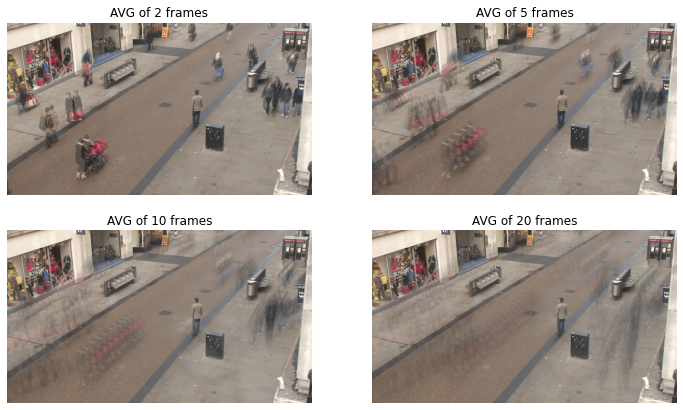

In [67]:
backgrounds = get_background(frames, count=[2, 5, 10, 20])

### Part B.

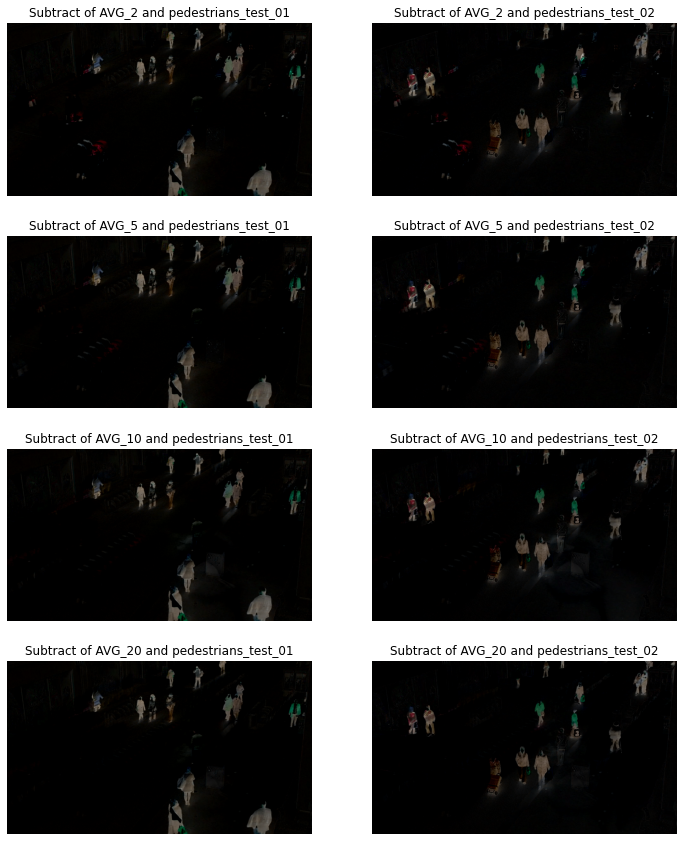

In [114]:
count = [2, 5, 10, 20]
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
results = []
for i, background in enumerate(backgrounds):
    for j, test in enumerate(tests):
        sub = np.subtract(background.astype(np.float16), test)
        for k in range(sub.reshape(-1).shape[0]):
            if sub.reshape(-1)[k] < 0:
                sub.reshape(-1)[k] = 0
        axes[i, j].imshow(sub.astype(np.uint8))
        axes[i, j].set_title('Subtract of AVG_{} and {}'.format(count[i], tests_names[j]))
        axes[i, j].axis('off')
        results.append(sub)
plt.show()

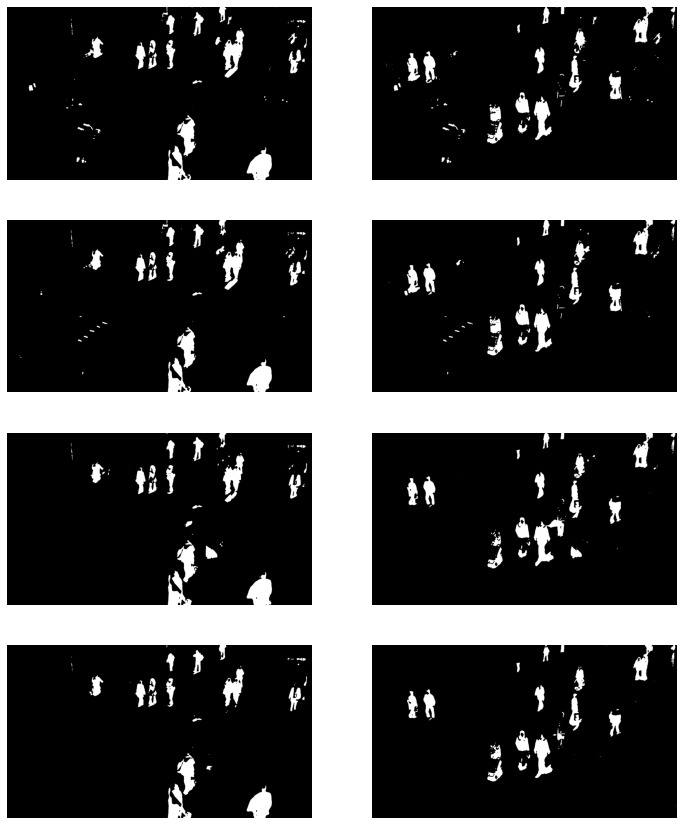

In [217]:
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
masks = []
for i, (res, ax) in enumerate(zip(results, axes.reshape(-1))):
    res = res.astype(np.uint8)
    res = cv2.cvtColor(res.astype(np.uint8), cv2.COLOR_RGB2GRAY)
    res = cv2.inRange(res, 20, 255)
    _, res = cv2.threshold(res, 0, 1, cv2.THRESH_BINARY)
    res = cv2.medianBlur(res, 7)
    masks.append(res)
    ax.imshow(res, cmap='gray')
    ax.axis('off')
plt.show()

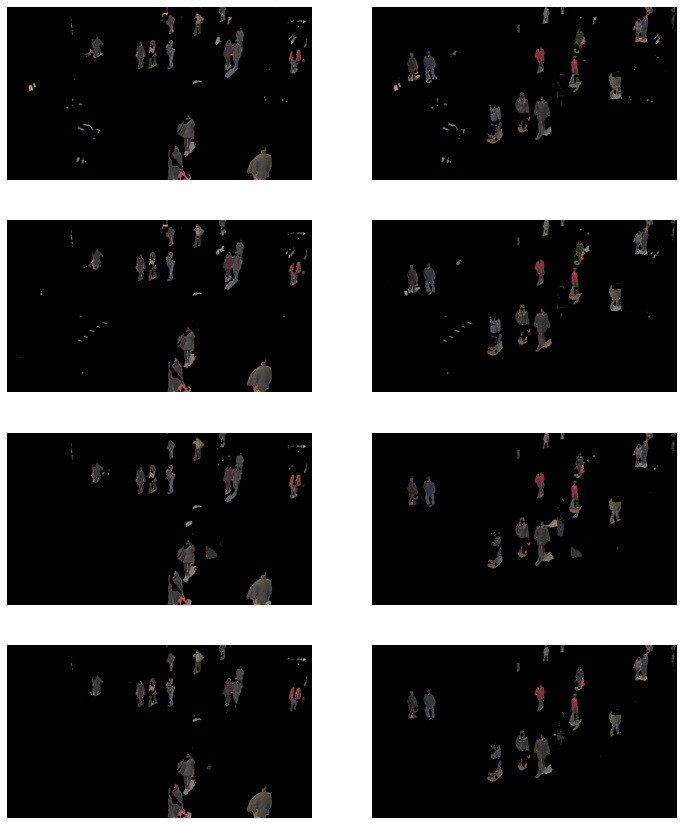

In [222]:
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
for i, (mask, ax) in enumerate(zip(masks, axes.reshape(-1))):
    individuals = np.zeros(test.shape).astype(np.uint8)
    temp = tests[0] if np.mod(i, 2) == 0 else tests[1]
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i, j] == 1:
                individuals[i, j] = temp[i, j]

    ax.imshow(individuals)
    ax.axis('off')
plt.show()